In [2]:
import pandas as pd
import numpy as np

In [3]:
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode(connected=True)

# DTW Clustering Analysis

### ETAPA 1: padronizar os dados (de 0 a 1). Cada valor é dividido pelo valor máximo da série.

Os dados ja foram padronizados no pré tratamento

### Visualizações

In [41]:
# Transformando as series em lista (para ser iteradas)
import os
list_files = os.listdir('./data/')

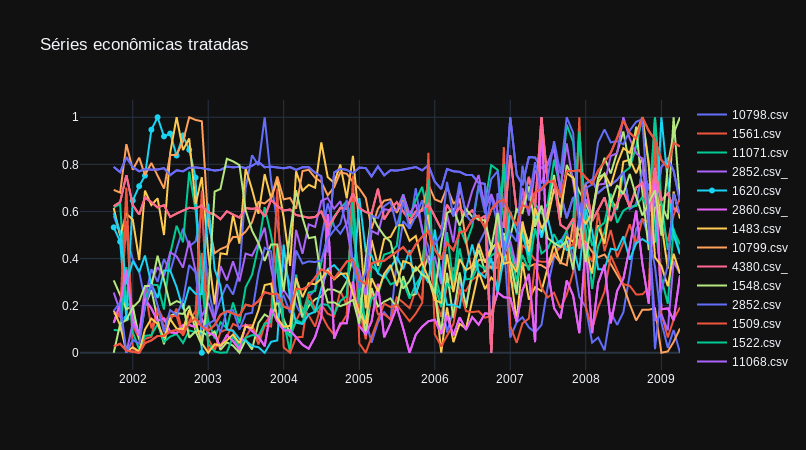

In [47]:
data = []
for file in list_files:
    temp_df = pd.read_csv('./data/'+file, index_col=0)
    x = temp_df['Data'].str.split('/')
    x = [i[1]+'-'+i[0] for i in x]
    y = temp_df[temp_df.columns[-1]].astype('float')
    trace = go.Scatter(x = x, y = y, name = file)
    data.append(trace)
    
layout = go.Layout(title = 'Séries econômicas tratadas',
                   xaxis = dict(type = 'date'),
                   template  = 'plotly_dark')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename = './plots/series_tratadas.html',config=dict(showLink = False))

In [ ]:
# Criando um pandas com todas as séries
series_padronizadas = pd.DataFrame()

for file in list_files:
    temp_df = pd.read_csv('./data/'+file, index_col=0)
    x = temp_df['Data'].str.split('/')
    x = [i[1]+'-'+i[0] for i in x]
    y = temp_df[temp_df.columns[-1]].astype('float')
    trace = go.Scatter(x = x, y = y, name = file)
    data.append(trace)

### ETAPA 2: Escolher uma métrica de dissimilaridade

Deve se escolher uma métrica que gere clusters mais interpretáveis. Geralmente é definida após experimentação. No artigo analisado, se utilizou de 3 métricas para testes:
- STS - short time series
- Distância baseado em um índice de correlação cruzada
- DTW
    * Essa métrica permite comparação de séries com tamanhos diferentes (mensal com anual, por exemplo). Tudo indica que será a ideal para RORAIMA.

#### DTW (Dynamic Time Warping)
$$d_{DTW} = min \frac{\sum_{k=1}^K w_k}{K}$$

O DTW (dynamic time warping) ou alinhamento temporal dinâmico é a
generalização dos algoritmos clássicos para comparar sequências discretas com
sequências de valores contínuos, muito usado também para comparar sequências
de DNA/RNA. 

Dado duas séries temporais , Q = q1, q2, . . . , qi, . . . , qn e R = r1, r2, . .
. , rj , . . . , rm, **DTW alinha as duas séries minimizando suas diferenças.** Para esse
fim, é construída uma matriz n × m onde o elemento (i , j) contem a distância
d ( q i , r j ) entre dois pontos q i e r j . A distância euclidiana é normalmente usada.

Programação dinâmica pode ser usada de maneira muito eficiente para encontrar
o caminho warping, utilizando o algoritmo abaixo.

$$dcum(i, j ) = d(qi, rj ) + min \{ dcum(i − 1, j − 1), dcum(i − 1, j ), dcum(i, j − 1) \}$$